# IFT 599/799 – Science des données

## TP1 : Visualisation

Ce TP porte sur l’analyse des données pour comprendre et visualiser la répartition des
données. Iris est un ensemble de données très connu du domaine de la science
des données. Il contient 150 observations (ou objets) réparties en 3 classes
(appelées respectivement setosa, versicolor, virginica) de 50 observations chacun.
Iris contient 4 variables (sepal_length, sepal_width, petal_length, petal_width).

# Introduction : compréhension des données et visualisation de leur dispersion

In [1]:
## Dans un premier temps, il est nécessaire d'importer les différente librairies utilisées,
## telles que numpy, panda ou matplotlib. 

import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

In [24]:
## On lit ensuite les données qui sont sous un format csv, séparées par une virgule.
## On s'assure également qu'il n'existe aucun objet possédant une caractéristique vide
## grâce à la fonction dropna(). 

data = pd.read_csv("iris.csv", sep=',', na_values='␣', encoding='latin-1')
data.dropna(how="all", inplace=True)

print("Forme du jeu de données iris.csv : ",data.shape)

Forme du jeu de données iris.csv :  (150, 5)


La forme de notre jeu de données nous montre qu'il possède 150 objets chacun composé de 5 attributs. 

In [25]:
## Nous souhaitons désormais visualiser le contenu de notre jeu de données. 
## Pour cela on va regarder les 5 premiers objets et leurs attributs
## après avoir mélangé ces objets grâce à la fonction sample()

data.sample(frac=0.7).head()

,sepal_length,sepal_width,petal_length,petal_width,species
21,5.1,3.7,1.5,0.4,setosa
35,5.0,3.2,1.2,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
34,4.9,3.1,1.5,0.2,setosa
94,5.6,2.7,4.2,1.3,versicolor


Chaque ligne correspond ainsi à un objet de notre jeu de données, et chaque colonne un attribut. On peut observer que ces attributs correspondent à "sepal_length", "sepal_width", "petal_length", "petal_width" et "species". On remarque que le dernier attribut possèdent des valeurs nominales, tandis que les autres attributs correspondent à des ratios : ce sont des longueurs ou des largeurs.

Le but du TP est de savoir s'il est possible de séparer distinctement les trois classes représentant des fleurs différentes dans l'attribut "species". Pour cela, il est intéressant de séparer les objets par espèce et de les visualiser dans un "boxplot", afin d'obtenir des premières informations concernant les attributs entre chaque espèce. 

In [4]:
sepal_length = [data['sepal_length'].loc[data['species'] == "virginica"], data['sepal_length'].loc[data['species'] == "versicolor"],data['sepal_length'].loc[data['species'] == "setosa"]]
sepal_width = [data['sepal_width'].loc[data['species'] == "virginica"], data['sepal_width'].loc[data['species'] == "versicolor"],data['sepal_width'].loc[data['species'] == "setosa"]]
petal_length = [data['petal_length'].loc[data['species'] == "virginica"], data['petal_length'].loc[data['species'] == "versicolor"],data['petal_length'].loc[data['species'] == "setosa"]]
petal_width = [data['petal_width'].loc[data['species'] == "virginica"], data['petal_width'].loc[data['species'] == "versicolor"],data['petal_width'].loc[data['species'] == "setosa"]]

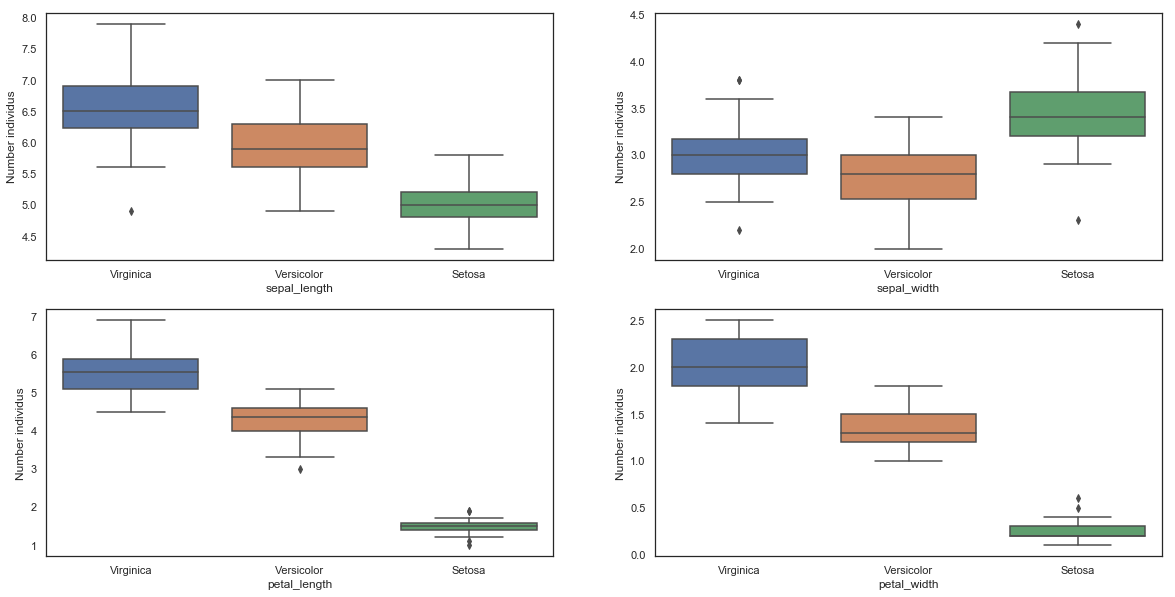

In [6]:
import seaborn as sns
labels = ['Virginica', 'Versicolor', 'Setosa']

sns.set(style="white")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

dict1 = {'0':(sepal_length, axes[0, 0],"sepal_length"),
         '1':(sepal_width,axes[0, 1],"sepal_width"),
         '2':(petal_length,axes[1, 0],"petal_length"),
         '3':(petal_width,axes[1, 1],"petal_width")
        }

for i in range(4):
    sns.boxplot( 
        x=labels,
        y=dict1[str(i)][0],
        ax=dict1[str(i)][1],
        ).set(
        xlabel=dict1[str(i)][2], 
        ylabel='Number individus',
        )


plt.show()

La figure précédente représente les boxplots pour chaque caractéristique séparée par espèce. D'après ce graphique, on peut voir l'étendue de nos données : 
Concernant la longueur des sépales, les fleurs setosas semblent avoir des sepals moins longues, tandis que les virginicas semblent avoir des sepals plus longues, de même pour la longueur des petales et leur largeur. Néanmoins cela s'inverse sur la largeur des sepales : les setosas semblent avoir des sepales plus larges tandis que virginica et versicolos moins larges. 

On peut remarquer des "points" se différenciant des boxplots sur nos graphiques : ils correspondent à des valeurs extrêmes selon la distance interquartile. Néanmoins, nous prenons la décision de ne pas les supprimer car nous n'avons pas plus d'informations concernant la façon dont les données ont été relevées. Ces points correspondent-ils à des erreurs lorsque les données ont été relevées, ou a des données "aberrantes" ? Des questions dont les réponses sont nécessaires pour pouvoir traiter correctement les valeurs aberrantes. 

# I - Méthode sans visualisation : comparaisons de distances

Durant ce TP, nous allons effectuer deux méthodes différentes : une uniquement calculatoire en comparant différentes distances entre classes et objets, et l'autre se reposant sur la visualisation avec et sans transformation des données. 

Les deux calculs consistent à "comparer la distance maximale entre un objet quelconque d’une classe, e.g. « setosa »,
et le centre de cette classe, avec la distance minimale entre un objet quelconque d’une autre classe, e.g. « versicolor », et le centre de la classe « setosa »." Deux différentes distances peuvent être utilisées : la distance euclidienne et la distance de Mahalinobis. La distance euclidienne correspond à la distance géométrique normale entre deux objets dans un espace multidimensionnel. Elle de définit comme suit : 

 $$euclidienne(p,q) =\sqrt{\sum_{n}(q_{i}-p{i})^{2}} $$
 
 La distance euclidienne possède néanmoins quelques limitations dans les jeux de données réels car elle ne prend pas en compte la dispersion des variables au sein d'une classe. C'est pourquoi, dans la seconde métrique que nous allons utiliser est la distance de Mahalanobis. Cette dernière se définit comme suit : 
 
 $$mahalanobis(p,q) =(p-q)^{T}\sum{-1}(p-q)$$
 
 où $$\sum{-1}$$ correspond à la matrice de covariance. 
La distance de Mahalanobis permet ainsi de calculer la distance entre deux points dans un espace multidimensionnel en redimensionnant les données de telle sorte à ce qu'elles n'aient plus de covariance. 


In [7]:
## La fonction distance_euclidienne() prend en attributs un objet de référence et la classe à laquelle
## on souhaite le comparer et ressort un vecteur constitué de l'ensemble des distances euclidiennes entre cet 
## objet de référence et l'ensemble des objets de la classe. La distance euclidienne est calculée par la fonction
## de la bibliothèque numpy linalg.norm().

def distance_euclidienne(vec_ref, classe_compare):
    vec_dist = []
    for row in classe_compare.values:
        dist = np.linalg.norm(vec_ref-row)
        vec_dist.append(dist)
    return vec_dist

In [8]:
## La fonction distance_mahalanobis() prend en attributs un objet de référence, la classe à laquelle
## on souhaite le comparer et la matrice de covariance de la classe de référence. 
## Elle ressort un vecteur constitué de l'ensemble des distances de mahalanobis entre cet objet et l'ensemble 
## des objets de la classe. La formule appliquée est celle décrite plus haut dans le rapport. 


from scipy.spatial import distance

def distance_mahalinobis(vec_ref, classe_compare, covar_matrix):
    vec_dist_mahal = []
    inverse_covar_mat = np.linalg.inv(covar_matrix)
    for row in classe_compare.values:
        mahal_dist =(row - vec_ref.T).dot(inverse_covar_mat).dot((row - vec_ref.T).T)
        vec_dist_mahal.append(mahal_dist)
    return vec_dist_mahal

In [30]:
## La fonction tab_distances_comparaison() prend en entrée un booleen permettant de spécifier la distance que
## l'on souhaite utiliser lors des calculs. Elle permet de calculer la distance maximale spécifiée entre 
## un objet quelconque d'une classe et la moyenne de cette même classe, et la distance minimale d'un objet 
## quelconque d'une autre classe et la moyenne de la classe de référence. 
## Cette fonction retourne un tableau de type DataFrame contenant la différence obtenue entre le 
## premier calcul de distance et le second pour chacune des classes. 


def tab_distances_comparaison(euclidienne=True):
    
    virginica = data.loc[data['species'] == "virginica"]
    virginica = virginica.drop(["species"], axis=1)
    setosa = data.loc[data['species'] == "setosa"]
    setosa = setosa.drop(["species"], axis=1)
    versicolor = data.loc[data['species'] == "versicolor"]
    versicolor = versicolor.drop(["species"], axis=1)
    
    virginica_mean = virginica.mean()
    setosa_mean = setosa.mean()
    versicolor_mean = versicolor.mean()
    
    if euclidienne:
        
        ## Nous avons pris la décision de ne pas standardiser ( centrer, réduire ) les données pour 
        ## effectuer la distance euclidienne, car nous souhaitons uniquement comparer les valeurs obtenues
        ## entre elles. 

        max_setosa = np.max(distance_euclidienne(setosa_mean, setosa))
        max_versicolor = np.max(distance_euclidienne(versicolor_mean, versicolor))
        max_virginica = np.max(distance_euclidienne(virginica_mean, virginica))

        mean_setosa = np.mean(distance_euclidienne(setosa_mean, setosa))
        mean_versicolor = np.mean(distance_euclidienne(versicolor_mean, versicolor))
        mean_virginica = np.mean(distance_euclidienne(virginica_mean, virginica))
        
        min_setosa_versi = np.min(distance_euclidienne(setosa_mean, versicolor))
        min_setosa_virgi = np.min(distance_euclidienne(setosa_mean, virginica))
        min_versi_setosa = np.min(distance_euclidienne(versicolor_mean, setosa))
        min_versi_virgi = np.min(distance_euclidienne(versicolor_mean, virginica))
        min_virgi_setosa = np.min(distance_euclidienne(virginica_mean, setosa))
        min_virgi_versi = np.min(distance_euclidienne(virginica_mean, versicolor))
        
    else:
        
        ## Le cacul des matrices de covariance s'est effectué grâce à la fonction cov() de la bibliothèque
        ## numpy
        
        setosa_covar_matrix = np.cov(setosa.values.T)
        versicolor_covar_matrix = np.cov(versicolor.values.T)
        virginica_covar_matrix = np.cov(virginica.values.T)
        
        max_setosa = np.max(distance_mahalinobis(setosa_mean, setosa,setosa_covar_matrix))
        max_versicolor = np.max(distance_mahalinobis(versicolor_mean, versicolor,versicolor_covar_matrix))
        max_virginica = np.max(distance_mahalinobis(virginica_mean, virginica,virginica_covar_matrix))

        mean_setosa = np.mean(distance_mahalinobis(setosa_mean, setosa,setosa_covar_matrix))
        mean_versicolor = np.mean(distance_mahalinobis(versicolor_mean, versicolor,versicolor_covar_matrix))
        mean_virginica = np.mean(distance_mahalinobis(virginica_mean, virginica,virginica_covar_matrix))
        
        min_setosa_versi = np.min(distance_mahalinobis(setosa_mean, versicolor,setosa_covar_matrix))
        min_setosa_virgi = np.min(distance_mahalinobis(setosa_mean, virginica,setosa_covar_matrix))
        min_versi_setosa = np.min(distance_mahalinobis(versicolor_mean, setosa,versicolor_covar_matrix))
        min_versi_virgi = np.min(distance_mahalinobis(versicolor_mean, virginica,versicolor_covar_matrix))
        min_virgi_setosa = np.min(distance_mahalinobis(virginica_mean, setosa,virginica_covar_matrix))
        min_virgi_versi = np.min(distance_mahalinobis(virginica_mean, versicolor,virginica_covar_matrix))
        
    dif_seto_versi = max_setosa - min_setosa_versi
    dif_seto_virgi = max_setosa - min_setosa_virgi
    dif_versi_seto = max_versicolor - min_versi_setosa
    dif_versi_virgi = max_versicolor - min_versi_virgi
    dif_virgi_seto = max_virginica - min_virgi_setosa
    dif_virgi_versi = max_virginica - min_virgi_versi
        
    ref = ['setosa','virginica','versicolor']
    distances = {'référence': ref, 'setosa': ['0',dif_seto_virgi, dif_seto_versi], 'virginica':[dif_versi_seto,'0',dif_versi_virgi], 'versicolor':[dif_virgi_seto,dif_virgi_versi,'0']}
    distances_df = pd.DataFrame(distances)
    
    return distances_df

## Résultats concernant la distance Euclidienne

In [28]:
distances_df_euclidienne = tab_distances_comparaison(True)
distances_df_euclidienne.head()

,référence,setosa,virginica,versicolor
0,setosa,0,-1.3087,-2.27431
1,virginica,-2.24711,0,1.4192
2,versicolor,-0.743145,0.795422,0


Ainsi, une valeur négative signifie que les classes sont bien séparées, c'est à dire que la distance minimale entre la moyenne d'une classe et l'objet d'une autre classe et supérieure à la distance maximale entre la moyenne de la classe et un objet quelconque de cette même classe. 
Ainsi, d'après les résultats présents dans le DataFrame, on peut conclure que la classe Setosa est bien séparée des classes Virginica et Versicolor. Par ailleurs, on peut également voir que les classes Virginica et Versicolor possèdent du recouvrement : on ne peut donc pas conclure sur la séparation de ces deux classes.

Comme présenté plus haut, ces résultats sont à considérer avec du recul. Effectivement, la distance euclidienne ne prend pas en considération la dispersion des variables dans une classe. 

## Résultats concernant la distance de Mahalanobis

In [29]:
distances_df_mahalinobis = tab_distances_comparaison(False)
distances_df_mahalinobis.head()

,référence,setosa,virginica,versicolor
0,setosa,0,-40.9766,-109.789
1,virginica,-426.267,0,10.9292
2,versicolor,-123.459,7.10986,0


Concernant la distance de Mahalanobis, on retrouve les mêmes résultats que précédemment. On peut donc conclure que, malgré la dispersion des variables, la classe Setosa est bien séparée des classes Virginica et Versicolor, tandis que l'on ne peut pas émettre de conclusion sur la séparation des classes Virginica et Versicolor. 

# II - Méthode avec visualisations : distributions des classes, agencement dans l'espace, et transformation des variables


La deuxième méthode utilisée dans ce document nous permettant de rendre compte de la séparation des classes se base sur différentes visualisations. Dans un premier temps on souhaitera afficher les histogrammes de chaque classe pour représenter leur distribution et ainsi visualiser l'état de séparation entre chacune des classes. Une deuxième visualisation consistera à afficher le nuage de points de chaque caractéristique par rapport à chacune autre. Par cette façon, en affichant chaque classe de couleur différente, on pourra voir l'état de séparation des classes, mais on pourrait également conclure sur la corrélation des caractéristiques entre elles. 
Finalement, afin de garder un maximum d'informations des données mais dans un espace réduit, nous appliquerons la méthode d'Analyse en Composantes Principales (ACP), et nous effectuerons une nouvelle fois chacune des différentes visualisations. 

## Histogrammes sur les variables non transformées

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



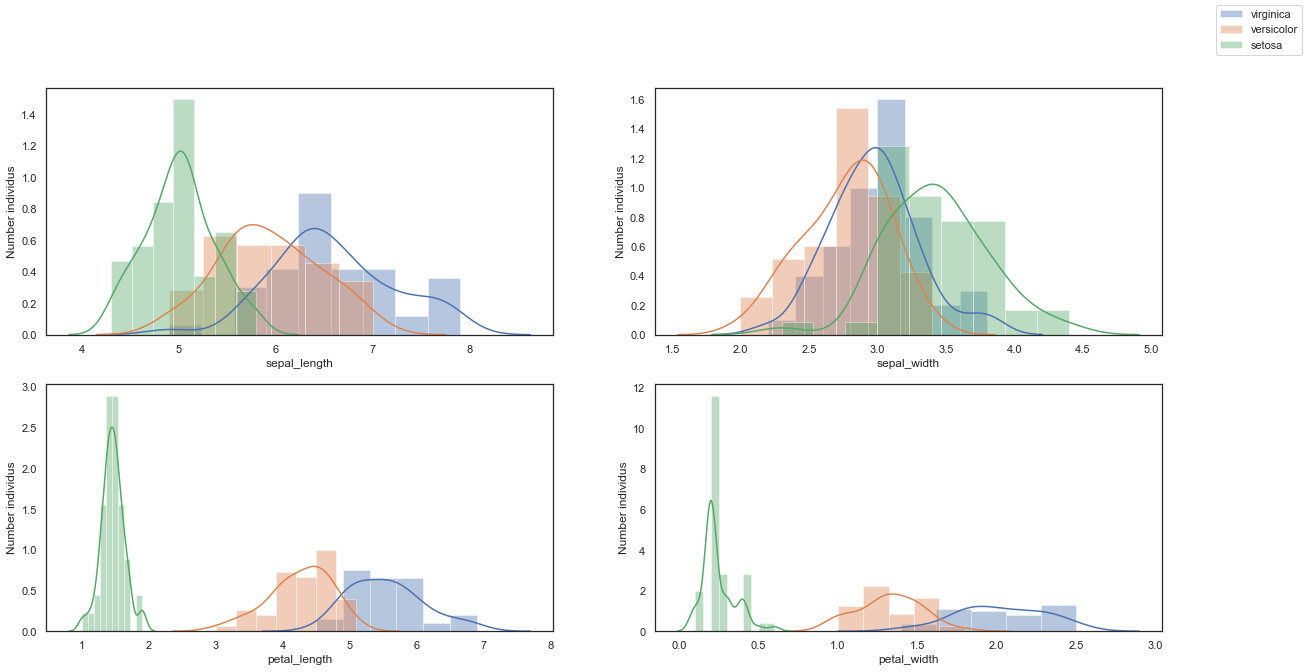

In [12]:
## Afin d'afficher les histogrammes de chacune des caractéristiques pour chaque espèce, nous avons utilisé
## la fonction displot() de la bibliothèque seaborn. Cette fonction nous permet de visualiser en même temps
## l'histogramme de chacune des caractéristiques, mais également une approximation de leur distribution.
## Chaque couleur correspond à une classe différente. 

sns.set(style="darkgrid")

labels = ["virginica","versicolor","setosa"]

sns.set(style="white")
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

dict1 = {'0':(sepal_length, axes[0, 0],"sepal_length"),
         '1':(sepal_width,axes[0, 1],"sepal_width"),
         '2':(petal_length,axes[1, 0],"petal_length"),
         '3':(petal_width,axes[1, 1],"petal_width")
        }

for i in range(4):
    for j in range(0,3):
        sns.distplot( 
            pd.to_numeric(dict1[str(i)][0][j]), 
            ax=dict1[str(i)][1],
            ).set(
            xlabel=dict1[str(i)][2], 
            ylabel='Number individus',
            )

fig.legend(labels)
plt.show()

D'après les figures ci dessus, on peut observer que sur les caractéristiques des sépales ("sepal_length","sepal_width"), l'ensemble des trois espèces ne peuvent pas être séparées. Néanmoins, concernant les pétales, l'espèce Setosa se démarque distinctement des deux autres, à la fois sur la longueur que sur la largeur. On remarque également que les fleurs de type Versicolor possèdent des longueurs et des largeurs de pétales légèrement inférieures aux espèces Virginica, néanmoins les deux caractéristiques se recoucrent tout de même. 

## Nuage de point sur les variables non transformées

<IPython.core.display.Javascript object>


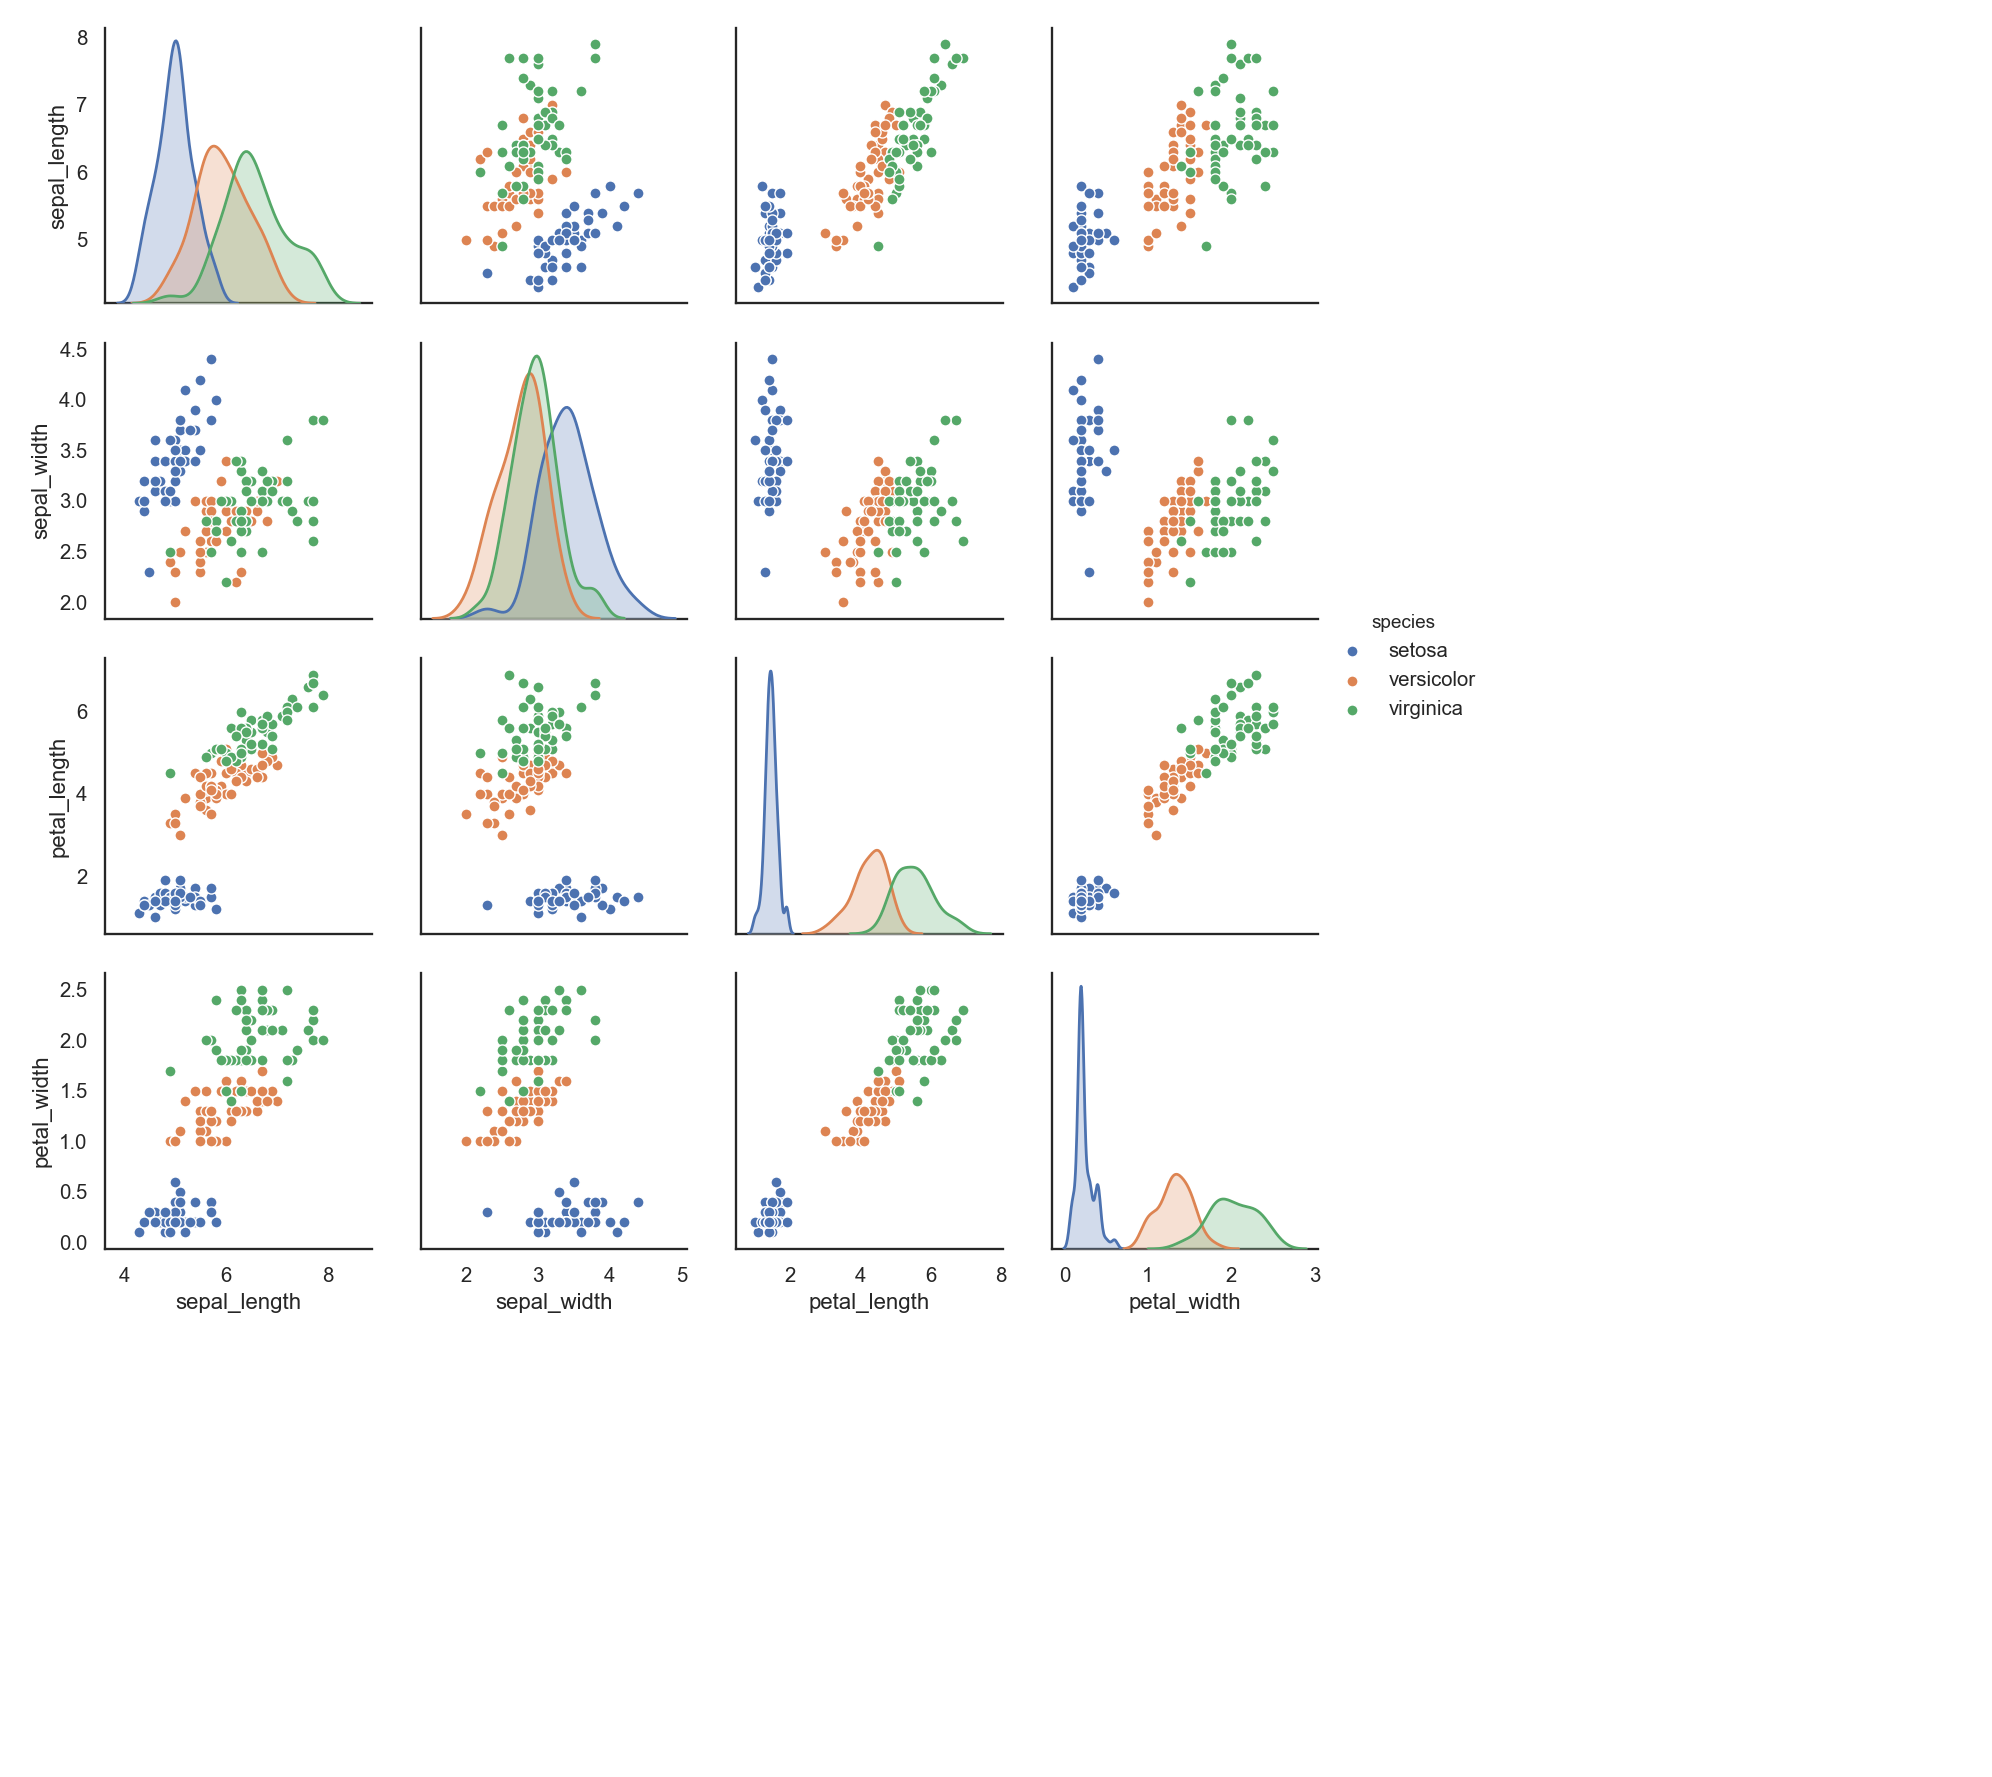

In [33]:
## Afin d'afficher les nuages de points de chacune des caractéristiques pour chaque espèce, nous avons utilisé
## la fonction pairplot() de la bibliothèque seaborn. Cette fonction nous permet de visualiser chaque objet
## projeté sur un axe composé de chacune des caractéristiques. Chaque espèce a été représentée par une couleurs
## différente. 

g = sns.pairplot(data, hue="species")

Parmis l'ensemble de ces projections, on remarque que l'on peut séparer distinctement les fleurs provenant de l'espèce Setosa des deux autres espèces, ce qui correspond bien aux observations que nous avons effectuée lors de nos analyses de distances. Par ailleurs on remarque toujours du recouvrement entre les deux autres variables. Néanmoins, ce recouvrement est bien plus important si l'on considère uniquement les projections sur les plans : "sepal_length" par rapport à "sepal_width" et inversement. 

## Analyse en Composantes Principales (ACP)

( Afin d'effectuer notre ACP en Python, nous nous sommes basés sur le code de l'article :
" USING PRINCIPAL COMPONENT ANALYSIS (PCA) FOR DATA EXPLORER. STEP BY STEP ", datant du 21 juin 2017, rédigé par Juan Carlos González, trouvé à l'adresse suivante: https://www.apsl.net/blog/2017/06/21/using-principal-component-analysis-pac-data-explore-step-step/.

In [13]:
## EXPLIQUER ACP
## 
## 
## 


from sklearn.preprocessing import StandardScaler


X = data.iloc[:,0:4].values
y = data.iloc[:,4].values

X_std = StandardScaler().fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cor_mat2 = np.corrcoef(X.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat2)
u,s,v = np.linalg.svd(X_std.T)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)


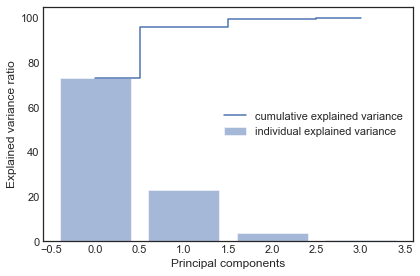

In [14]:
## Afin de savoir le nombre d'axes que l'on peut garder sans perdre trop d'informations dans nos données et dans
## le but de ne pas biaiser nos résultats après une ACP, il est pertinent de conserver suffisamment d'axes pour
## que 80% de la variance de notre jeu de données de base soit conservée. Ainsi, le code ci-dessous permet 
## d'afficher sur un barplot la variance conservée pour chaque axe, mais également de représenter le cumul de
## variance conservée en fonction des axes. 

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
plt.show()

Ainsi, sur le graphique, on remarque que le premier axe permet de conserver environ 75% de la variance, le deuxième 25%, le troisième environ 2% et le dernier presque rien. Ainsi, si l'on se base sur une conservation de 80% de la variance présente dans les données de départ, il est pertinent de conserver les deux premiers axes.

In [37]:
## D'après le graphique ci-dessus, on a conclu qu'il était pertinent de garder seulement les deux premiers axes.
## Néanmoins, dans la suite de notre rapport, nous souhaitons projeter les données dans un espace en
## trois-dimensions. Ainsi nous allons conserver les trois premiers axes.
## 
## La matrice de projection matrix_w permet de transformer les données de base vers les nouvelles caractéristiques
## de l'espace. On l'a ainsi créée avec nos trois premiers vecteurs propres. 


matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1),
                      eig_pairs[2][1].reshape(4,1)))

## On obtient finalement nos données traansformées en effectuant le produit des vecteurs entre nos données de base
## et chacun des vecteurs propres contenus dans notre matrice de projection. 

X_pca = X_std.dot(matrix_w)


In [17]:
y = pd.DataFrame(y)
X_pca = pd.DataFrame(X_pca, columns={'first_component','second_component','third_component'})
final_pca = np.concatenate((X_pca,y),axis=1)
final_pca = pd.DataFrame(final_pca, columns=["first_component","second_component","third_component","species"])

final_pca.sample(frac=0.7).head()

,first_component,second_component,third_component,species
56,0.74653,-0.773019,0.148969,versicolor
128,1.78835,0.187361,0.270658,virginica
103,1.44015,0.0469876,0.16363,virginica
6,-2.44403,-0.0476442,0.33547,setosa
9,-2.18433,0.469014,-0.253766,setosa


Le tableau résultant de l'ACP permet de montrer les nouvelles projections des anciens objets sur chacun des trois axes. 

## Histogramme sur les variables transformées

In [18]:
first_component = [final_pca[final_pca['species']=='virginica']['first_component'],final_pca[final_pca['species']=='versicolor']['first_component'], final_pca[final_pca['species']=='setosa']['first_component']]
second_component = [final_pca[final_pca['species']=='virginica']['second_component'],final_pca[final_pca['species']=='versicolor']['second_component'],final_pca[final_pca['species']=='setosa']['second_component']]
third_component = [final_pca[final_pca['species']=='virginica']['third_component'],final_pca[final_pca['species']=='versicolor']['third_component'],final_pca[final_pca['species']=='setosa']['third_component']]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



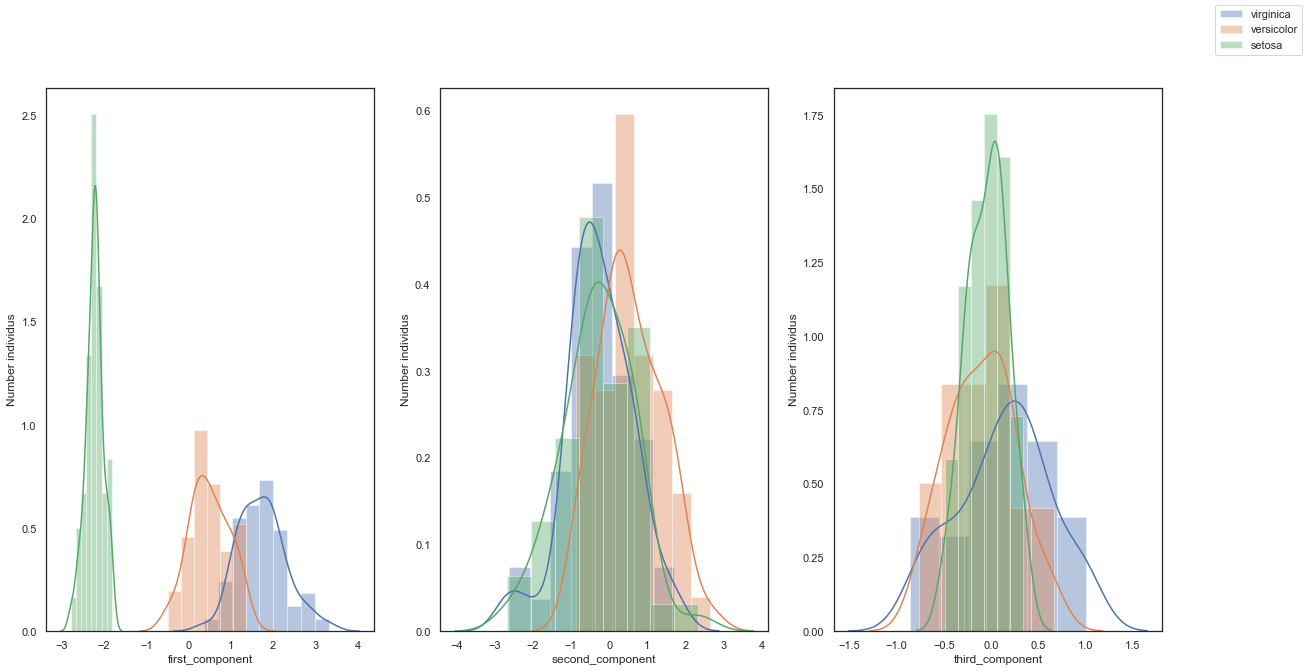

In [19]:
## Afin d'afficher les histogrammes de chacune des caractéristiques transformées pour chaque espèce, 
## nous avons effectué la même manipulation que lors de la visualisation des histogrammes plus tôt dans le 
## document. Chaque couleur correspond à une classe différente. 


sns.set(style="white")
np.seterr(divide='ignore', invalid='ignore')

labels = ["virginica","versicolor","setosa"]

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

dict2 = {'0':(first_component, axes[0],"first_component"),
         '1':(second_component,axes[1],"second_component"),
         '2':(third_component,axes[2],"third_component"),
        }

for i in range(3):
    for j in range(0,3):
        sns.distplot( 
            pd.to_numeric(dict2[str(i)][0][j]), 
            ax=dict2[str(i)][1],
            ).set(
            xlabel=dict2[str(i)][2], 
            ylabel='Number individus',
            )


fig.legend(labels)
plt.show()

D'après les graphiques ci-dessus, on peut remarquer que sur le premier axe, la distribution des nouveaux composantes des fleurs dont l'espèce est Setosa se démarque toujours des deux autres espèces. Néanmoins, sur ce même axe, on observe toujours du recouvrement concernant les espèces Virginica et Versicolor.
Concernant les deux autres axes, le recouvrement est très important quelle que soit l'espèce, on ne peut donc faire aucune séparation. 

## Nuage de point sur les variables transformées ( en 2 dimensions )

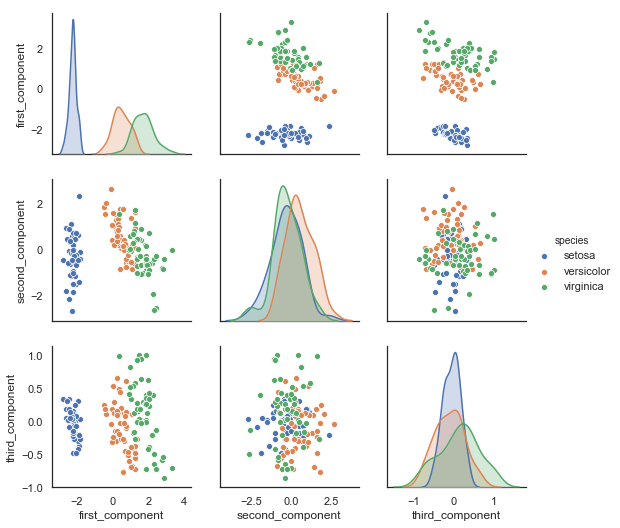

In [21]:
## Afin d'afficher les nuages de points de chacune des caractéristiques transformées pour chaque espèce, 
## nous avons effectué la même manipulation que lors de la visualisation des nuages de points plus tôt dans le 
## document. Chaque couleur correspond à une classe différente. 

g = sns.pairplot(final_pca, hue="species")

D'après les projections ci-dessus, on remarque que toujours la classe Setosa est remarquablement bien séparée des deux autres classes. De même, les espèces de Versicolor et Virginica ne semblent pas plus être mieux séparées une fois les variables transformées. Enfin, il ne semble pas pertinent de conserver les projections du deuxième axe sur le troisième axe ( ou inversement ). Effectivement, d'après la courbe nous permettant de visualiser la conservation de la variance, ces axes à eux deux ne conservent que 22% de l'information de base, et ne sont donc pas pertinentes seuls. 

## Nuage de point sur les variables transformées ( en 3 dimensions )


<IPython.core.display.Javascript object>


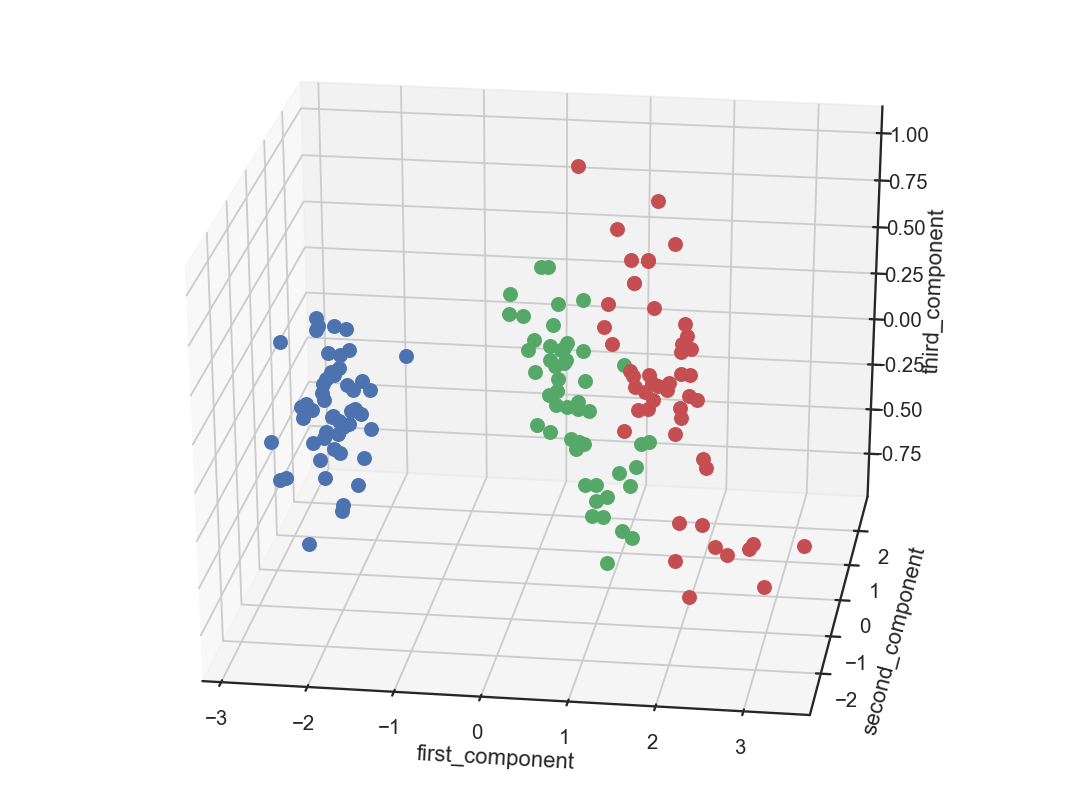

In [35]:
## Finalement nous avons souhaité projeter les données sur les trois axes conservés après notre ACP.  
## Ainsi, pour créer une figure 3D nous avons utilisé la fonction Axes3D de la bibliothèque pl_toolkits.mplot3d.  

cm = plt.get_cmap("ocean")
col = np.arange(150)

from mpl_toolkits.mplot3d import Axes3D
with plt.style.context('seaborn-white'):

    fig = plt.figure(figsize=(8, 6))
    ax = Axes3D(fig) 

    xs = pd.to_numeric(final_pca['first_component'])
    ys = pd.to_numeric(final_pca['second_component'])
    zs = pd.to_numeric(final_pca['third_component'])

    colors={'setosa':'b','virginica':'r','versicolor':'g'}
    for i in range(0,150):
        ax.scatter(xs[i], ys[i], zs[i], s=50, alpha=1, c=colors[final_pca['species'][i]])

    ax.set_xlabel('first_component')
    ax.set_ylabel('second_component')
    ax.set_zlabel('third_component')

plt.show()

En nous déplaçant dans l'environnement 3D, nous avons constaté que les objets provenant de la classe SETOSA étaient suffisamment bien séparés pour être linéairement séparés des deux autres espèces. Néanmoins, bien que leur dispersion soit légèrement différentes, il est beaucoup plus compliqué voir impossible de séparer linéairement les deux autres classes entre elles, même après avoir effectué une Analyse en Composantes Principales. 

# Conclusion

D'après l'ensemble de ces analyses, on peut en conclure que les trois classes ne sont pas toutes relativement bien séparées. Seule la classe Setosa peut être différenciée des deux autres. De plus, l'ACP n'apporte rien dans la séparation des données, car les nouvelles composantes ne permettent toujours pas une séparation totalement distincte. 